Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset

In [3]:
from sklearn.datasets import load_breast_cancer # Importing dataset from sklearn

cancer = load_breast_cancer() # Loading the dataset into cancer variable

print(cancer.keys()) # Checking the keys of the dataset dictionary

print(cancer['DESCR']) # Checking dataset description

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were c

In [4]:
cancer['feature_names'] # Checking all the column names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Feature Selection

In [5]:
X = cancer['data'] # Independant variables

y = cancer['target'] # Dependant variable

cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [8]:
X[0:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [7]:
y[0:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0])

Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

Feature Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [11]:
X_train[0] # Before scaling

array([1.317e+01, 1.822e+01, 8.428e+01, 5.373e+02, 7.466e-02, 5.994e-02,
       4.859e-02, 2.870e-02, 1.454e-01, 5.549e-02, 2.023e-01, 6.850e-01,
       1.236e+00, 1.689e+01, 5.969e-03, 1.493e-02, 1.564e-02, 8.463e-03,
       1.093e-02, 1.672e-03, 1.490e+01, 2.389e+01, 9.510e+01, 6.876e+02,
       1.282e-01, 1.965e-01, 1.876e-01, 1.045e-01, 2.235e-01, 6.925e-02])

In [12]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
X_train[0] # After Scaling

array([0.30280346, 0.28779168, 0.28292922, 0.16704136, 0.19888056,
       0.12440955, 0.11384724, 0.14264414, 0.1989899 , 0.11647009,
       0.03728187, 0.07124851, 0.02677025, 0.01806076, 0.19688208,
       0.09521735, 0.03949495, 0.16031445, 0.0428885 , 0.02685074,
       0.24795446, 0.31636461, 0.22257085, 0.12347621, 0.37660965,
       0.16416839, 0.14984026, 0.35910653, 0.13207175, 0.09320478])

ANN Model

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [15]:
X_train.shape

(426, 30)

In [17]:
model = Sequential()
# Input layer (30 neurons for 30 inputs)
model.add(Dense(units=30, activation='relu'))
# Hidden Layer
model.add(Dense(units=15, activation='relu'))
# Output Layer
model.add(Dense(units=1, activation='sigmoid'))
# For multi-class units=no. of classes, activation='softmax'

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model.fit(
x=X_train,
y=y_train,
epochs=600,
validation_data=(X_test, y_test),
verbose=1
)

Epoch 1/600
14/14 [==============================] - 0s 20ms/step - loss: 0.6635 - accuracy: 0.6174 - val_loss: 0.6378 - val_accuracy: 0.8811
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6157 - accuracy: 0.8122 - val_loss: 0.5953 - val_accuracy: 0.8392
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5655 - accuracy: 0.8521 - val_loss: 0.5431 - val_accuracy: 0.8951
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5123 - accuracy: 0.8709 - val_loss: 0.4823 - val_accuracy: 0.8741
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4598 - accuracy: 0.8685 - val_loss: 0.4316 - val_accuracy: 0.9021
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4130 - accuracy: 0.8850 - val_loss: 0.3789 - val_accuracy: 0.9091
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3666 - accuracy: 0.8850 - val_loss: 0.3356 - val_accuracy: 0.9301
Epoch 8/600


14/14 [==============================] - 0s 2ms/step - loss: 0.0595 - accuracy: 0.9812 - val_loss: 0.1172 - val_accuracy: 0.9650
Epoch 59/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0575 - accuracy: 0.9812 - val_loss: 0.1113 - val_accuracy: 0.9790
Epoch 60/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0567 - accuracy: 0.9812 - val_loss: 0.1105 - val_accuracy: 0.9790
Epoch 61/600
14/14 [==============================] - ETA: 0s - loss: 0.0806 - accuracy: 0.96 - 0s 3ms/step - loss: 0.0600 - accuracy: 0.9812 - val_loss: 0.1216 - val_accuracy: 0.9650
Epoch 62/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0601 - accuracy: 0.9836 - val_loss: 0.1176 - val_accuracy: 0.9650
Epoch 63/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0573 - accuracy: 0.9836 - val_loss: 0.1125 - val_accuracy: 0.9790
Epoch 64/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0557 - accuracy: 0.9765 - val_loss: 0.1076 

14/14 [==============================] - 0s 2ms/step - loss: 0.0461 - accuracy: 0.9859 - val_loss: 0.1197 - val_accuracy: 0.9720
Epoch 116/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0442 - accuracy: 0.9836 - val_loss: 0.1222 - val_accuracy: 0.9720
Epoch 117/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0455 - accuracy: 0.9836 - val_loss: 0.1183 - val_accuracy: 0.9720
Epoch 118/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0468 - accuracy: 0.9812 - val_loss: 0.1154 - val_accuracy: 0.9720
Epoch 119/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0472 - accuracy: 0.9836 - val_loss: 0.1225 - val_accuracy: 0.9650
Epoch 120/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0444 - accuracy: 0.9859 - val_loss: 0.1175 - val_accuracy: 0.9720
Epoch 121/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0443 - accuracy: 0.9836 - val_loss: 0.1128 - val_accuracy: 0.9790
Epoch 122/600

14/14 [==============================] - 0s 4ms/step - loss: 0.0393 - accuracy: 0.9859 - val_loss: 0.1316 - val_accuracy: 0.9650
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0398 - accuracy: 0.9836 - val_loss: 0.1239 - val_accuracy: 0.9720
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0377 - accuracy: 0.9883 - val_loss: 0.1267 - val_accuracy: 0.9650
Epoch 174/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0402 - accuracy: 0.9836 - val_loss: 0.1329 - val_accuracy: 0.9650
Epoch 175/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0413 - accuracy: 0.9859 - val_loss: 0.1177 - val_accuracy: 0.9790
Epoch 176/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0388 - accuracy: 0.9836 - val_loss: 0.1290 - val_accuracy: 0.9650
Epoch 177/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0366 - accuracy: 0.9859 - val_loss: 0.1256 - val_accuracy: 0.9650
Epoch 178/600

14/14 [==============================] - 0s 3ms/step - loss: 0.0317 - accuracy: 0.9859 - val_loss: 0.1311 - val_accuracy: 0.9650
Epoch 229/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0317 - accuracy: 0.9859 - val_loss: 0.1372 - val_accuracy: 0.9510
Epoch 230/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0321 - accuracy: 0.9883 - val_loss: 0.1365 - val_accuracy: 0.9510
Epoch 231/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.9883 - val_loss: 0.1341 - val_accuracy: 0.9720
Epoch 232/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9883 - val_loss: 0.1307 - val_accuracy: 0.9720
Epoch 233/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.9883 - val_loss: 0.1298 - val_accuracy: 0.9720
Epoch 234/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0338 - accuracy: 0.9836 - val_loss: 0.1470 - val_accuracy: 0.9510
Epoch 235/600

14/14 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.9883 - val_loss: 0.1410 - val_accuracy: 0.9720
Epoch 285/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9883 - val_loss: 0.1349 - val_accuracy: 0.9720
Epoch 286/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9883 - val_loss: 0.1406 - val_accuracy: 0.9650
Epoch 287/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9883 - val_loss: 0.1416 - val_accuracy: 0.9650
Epoch 288/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0257 - accuracy: 0.9883 - val_loss: 0.1449 - val_accuracy: 0.9510
Epoch 289/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9859 - val_loss: 0.1549 - val_accuracy: 0.9441
Epoch 290/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0271 - accuracy: 0.9883 - val_loss: 0.1427 - val_accuracy: 0.9650
Epoch 291/600

Epoch 341/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9906 - val_loss: 0.1481 - val_accuracy: 0.9580
Epoch 342/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0233 - accuracy: 0.9883 - val_loss: 0.1708 - val_accuracy: 0.9510
Epoch 343/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0212 - accuracy: 0.9953 - val_loss: 0.1440 - val_accuracy: 0.9580
Epoch 344/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0231 - accuracy: 0.9859 - val_loss: 0.1644 - val_accuracy: 0.9510
Epoch 345/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0250 - accuracy: 0.9930 - val_loss: 0.1442 - val_accuracy: 0.9580
Epoch 346/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0211 - accuracy: 0.9906 - val_loss: 0.1715 - val_accuracy: 0.9510
Epoch 347/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0222 - accuracy: 0.9953 - val_loss: 0.1569 - val_accuracy: 0.9580

14/14 [==============================] - 0s 2ms/step - loss: 0.0190 - accuracy: 0.9977 - val_loss: 0.1734 - val_accuracy: 0.9510
Epoch 399/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0168 - accuracy: 0.9930 - val_loss: 0.1679 - val_accuracy: 0.9580
Epoch 400/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0190 - accuracy: 0.9977 - val_loss: 0.1621 - val_accuracy: 0.9580
Epoch 401/600
14/14 [==============================] - ETA: 0s - loss: 0.0516 - accuracy: 0.96 - 0s 2ms/step - loss: 0.0192 - accuracy: 0.9906 - val_loss: 0.1676 - val_accuracy: 0.9580
Epoch 402/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0204 - accuracy: 0.9906 - val_loss: 0.2039 - val_accuracy: 0.9510
Epoch 403/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0180 - accuracy: 0.9953 - val_loss: 0.1667 - val_accuracy: 0.9580
Epoch 404/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 0.9930 - val_loss: 0

Epoch 455/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0135 - accuracy: 0.9977 - val_loss: 0.2022 - val_accuracy: 0.9510
Epoch 456/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0136 - accuracy: 0.9953 - val_loss: 0.2031 - val_accuracy: 0.9510
Epoch 457/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0130 - accuracy: 0.9977 - val_loss: 0.1934 - val_accuracy: 0.9510
Epoch 458/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 0.9953 - val_loss: 0.2046 - val_accuracy: 0.9510
Epoch 459/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0128 - accuracy: 0.9977 - val_loss: 0.1924 - val_accuracy: 0.9510
Epoch 460/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0128 - accuracy: 0.9977 - val_loss: 0.2202 - val_accuracy: 0.9441
Epoch 461/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0139 - accuracy: 0.9953 - val_loss: 0.2058 - val_accuracy: 0.9510

14/14 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.9977 - val_loss: 0.2289 - val_accuracy: 0.9510
Epoch 513/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 0.9977 - val_loss: 0.2289 - val_accuracy: 0.9510
Epoch 514/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.2169 - val_accuracy: 0.9510
Epoch 515/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 0.9977 - val_loss: 0.2229 - val_accuracy: 0.9510
Epoch 516/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.2197 - val_accuracy: 0.9510
Epoch 517/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.2351 - val_accuracy: 0.9510
Epoch 518/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 0.9977 - val_loss: 0.2275 - val_accuracy: 0.9510
Epoch 519/600

14/14 [==============================] - 0s 2ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.2587 - val_accuracy: 0.9441
Epoch 570/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.2755 - val_accuracy: 0.9441
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.2546 - val_accuracy: 0.9441
Epoch 572/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 0.9977 - val_loss: 0.2804 - val_accuracy: 0.9441
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9953 - val_loss: 0.3173 - val_accuracy: 0.9301
Epoch 574/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0.2426 - val_accuracy: 0.9510
Epoch 575/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.2768 - val_accuracy: 0.9510
Epoch 576/600

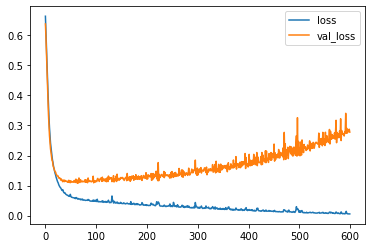

In [19]:
loss = pd.DataFrame(model.history.history)
# We get loss, validation loss, accuracy and validation accuracy
# Let us plot training loss and validation (testing) loss
loss.drop(['accuracy', 'val_accuracy'], axis=1).plot()
# We can see that overfitting has taken place

Early Stopping to Prevent Overfitting

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
# The early stopping callback will try to minimize validation loss
# It will continue monitoring for 25 epochs after val_loss starts increasing

model.fit(
x=X_train,
y=y_train,
epochs=600,
validation_data=(X_test, y_test),
verbose=1,
callbacks=[early_stop]
)
# callbacks should be an array

Epoch 1/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.2922 - val_accuracy: 0.9371
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.2919 - val_accuracy: 0.9371
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.2810 - val_accuracy: 0.9441
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.2846 - val_accuracy: 0.9441
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.2850 - val_accuracy: 0.9441
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.2844 - val_accuracy: 0.9441
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.3010 - val_accuracy: 0.9371
Epoch 8/600
1

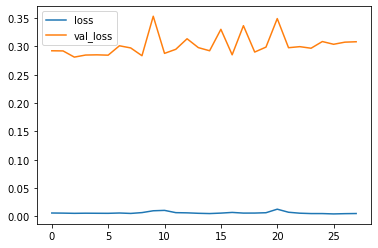

In [21]:
loss = pd.DataFrame(model.history.history)
loss.drop(['accuracy', 'val_accuracy'], axis=1).plot()

Dropout to Reduce Overfitting

In [22]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=15,activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', metrics=['Accuracy'], optimizer='adam')

model.fit(
x=X_train,
y=y_train,
epochs=600,
validation_data=(X_test, y_test),
verbose=1,
callbacks=[early_stop]
)

Epoch 1/600
14/14 [==============================] - 0s 11ms/step - loss: 0.7095 - accuracy: 0.0000e+00 - val_loss: 0.6744 - val_accuracy: 0.0000e+00
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6845 - accuracy: 0.0000e+00 - val_loss: 0.6532 - val_accuracy: 0.0000e+00
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.0000e+00 - val_loss: 0.6283 - val_accuracy: 0.0000e+00
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6427 - accuracy: 0.0000e+00 - val_loss: 0.6110 - val_accuracy: 0.0000e+00
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6286 - accuracy: 0.0000e+00 - val_loss: 0.5890 - val_accuracy: 0.0000e+00
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6141 - accuracy: 0.0000e+00 - val_loss: 0.5628 - val_accuracy: 0.0000e+00
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5958 - accuracy: 0.0000e+00 - 

14/14 [==============================] - 0s 3ms/step - loss: 0.1622 - accuracy: 0.0000e+00 - val_loss: 0.1069 - val_accuracy: 0.0000e+00
Epoch 56/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1649 - accuracy: 0.0000e+00 - val_loss: 0.1048 - val_accuracy: 0.0000e+00
Epoch 57/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1581 - accuracy: 0.0000e+00 - val_loss: 0.1092 - val_accuracy: 0.0000e+00
Epoch 58/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1670 - accuracy: 0.0000e+00 - val_loss: 0.1084 - val_accuracy: 0.0000e+00
Epoch 59/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1649 - accuracy: 0.0000e+00 - val_loss: 0.1066 - val_accuracy: 0.0000e+00
Epoch 60/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1449 - accuracy: 0.0000e+00 - val_loss: 0.1027 - val_accuracy: 0.0000e+00
Epoch 61/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1614 - accuracy: 0.0000e+00 - val_los

14/14 [==============================] - 0s 2ms/step - loss: 0.0919 - accuracy: 0.0047 - val_loss: 0.0933 - val_accuracy: 0.0000e+00
Epoch 111/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1038 - accuracy: 0.0047 - val_loss: 0.0890 - val_accuracy: 0.0000e+00
Epoch 112/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1013 - accuracy: 0.0023 - val_loss: 0.0896 - val_accuracy: 0.0000e+00
Epoch 113/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1043 - accuracy: 0.0094 - val_loss: 0.0903 - val_accuracy: 0.0000e+00
Epoch 114/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0923 - accuracy: 0.0094 - val_loss: 0.0959 - val_accuracy: 0.0000e+00
Epoch 115/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0924 - accuracy: 0.0047 - val_loss: 0.0856 - val_accuracy: 0.0000e+00
Epoch 116/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1199 - accuracy: 0.0094 - val_loss: 0.0989 - val_accura

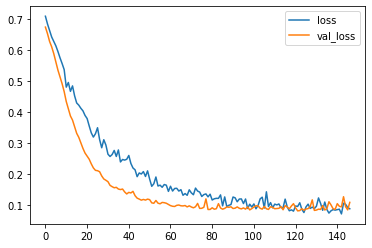

In [23]:
loss = pd.DataFrame(model.history.history)
loss.drop(['accuracy', 'val_accuracy'], axis=1).plot()

Classification Report & Confusion Matrix

In [24]:
predictions = model.predict(X_test)
predictions[0:10]

array([[9.9127614e-01],
       [9.8980260e-01],
       [9.9373919e-01],
       [3.5573840e-03],
       [9.9962354e-01],
       [9.9936026e-01],
       [9.9975562e-01],
       [2.1773008e-07],
       [9.9697179e-01],
       [9.9850655e-01]], dtype=float32)

In [25]:
predictions = np.round(model.predict(X_test)[:,0])
predictions[0:10]

array([1., 1., 1., 0., 1., 1., 1., 0., 1., 1.], dtype=float32)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 4 84]]


In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143

